## Support Vector Machines
The classifiers we have seen so far have used various ways to define a decision boundary. KNN classifiers use a local view given by the neighbors, resulting in a nonlinear, typically fractured decision boundary, Naive Bayes has used elliptic (Gaussian) definitions of the likelihood to delineate between classes, and decision trees use hypercubed to define their decision boundary. Support Vector Machines (SVMs) use a hyperplane to delineate the classes, and the main motivation of the SVM is to ask what the best hyperplane is if the classes is separable. Let's have a look at a simple example with two classes and some options for defining the separating hyperplane.


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from JSAnimation import IPython_display
from matplotlib import animation
from IPython.display import HTML
from sklearn import svm
def animateHyperplane(i):
    ax.cla()#clear axes
    ax.axis('equal')
    ax.grid()
    ax.set_ylim(-2.5,12)
    global D,y,slope,intercept
    ax.scatter(D[y == 0][:, 0], D[y == 0][:, 1], color='blue', s=10)
    ax.scatter(D[y == 1][:, 0], D[y == 1][:, 1], color='magenta', s=10)
    # plot hyperplane
    x_vals = np.linspace(D[:, 0].min() - 5, D[:, 0].max() + 5, 100)
    y_vals = slope[i] * x_vals + intercept[i]
    
    ax.plot(x_vals, y_vals,'k-',label=f'Hyperplane {i+1}')
    ax.set_title('What is the best separating hyperplane?')
    ax.legend()
    return

# Generate synthetic 2D data
D, y = make_blobs(n_samples=50, centers=2, cluster_std=1.0, random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(D, y)
w = clf.coef_[0]
b = clf.intercept_[0]
slope = [1,2,-w[0]/w[1],0.1,8]
intercept=[7,0,-b/w[1],4.5,-6]

fig = plt.figure()
ax = plt.axes()

anim = animation.FuncAnimation(fig, animateHyperplane, frames=5, interval=200, blit=False)

plt.close()
HTML(anim.to_jshtml())

What do you think is the best hyperplane? Think about what happens if we consider test data points of the two blobs. The test data might reach a bit outwards from the training data blobs. Hence, we don't want that the hyperplane is too close to one of the blobs. The best hyperplane is the one that is equidistant to both blobs, Hyperplane 3. Mathematically, this is expressed by the idea to maximize the margin, 

In [80]:
dist = np.abs(D@w+b)/np.linalg.norm(w)
np.argmin(dist)

24

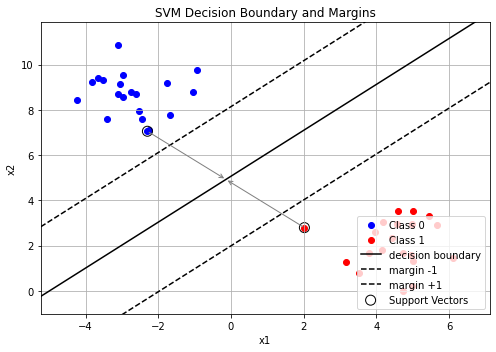

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# 1. Create toy data
X, y = make_blobs(n_samples=40, centers=2, cluster_std=1.0, random_state=42)

# 2. Train linear SVM
clf = SVC(kernel="linear", C=1)
clf.fit(X, y)

# 3. Extract weights and bias
w = clf.coef_[0]
b = clf.intercept_[0]

# 4. Define decision boundary and margin functions
def decision_function(x):
    return -(w[0]*x + b) / w[1]

def plot_margin(ax, X, y, w, b):
    # Plot decision boundary and margins
    x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500)
    ax.plot(x_vals, decision_function(x_vals), 'k-', label="decision boundary")
    ax.plot(x_vals, decision_function(x_vals - 1/np.linalg.norm(w)), 'k--', label="margin -1")
    ax.plot(x_vals, decision_function(x_vals + 1/np.linalg.norm(w)), 'k--', label="margin +1")

# 5. Plot
fig, ax = plt.subplots(figsize=(7, 5))

# Plot points
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

# Plot decision boundary and margins
plot_margin(ax, X, y, w, b)

# Highlight support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=100, facecolors='none', edgecolors='black', label='Support Vectors')

# Optional: draw arrows (distances) to hyperplane
def signed_distance(x):
    return (np.dot(x, w) + b) / np.linalg.norm(w)

for x in clf.support_vectors_:
    proj = x - signed_distance(x) * w / np.linalg.norm(w)
    ax.annotate('', xy=proj, xytext=x, arrowprops=dict(arrowstyle='->', color='gray'))

ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.set_title("SVM Decision Boundary and Margins")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


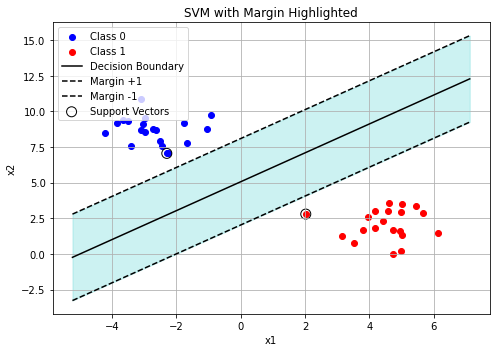

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate 2D data
X, y = make_blobs(n_samples=40, centers=2, random_state=42)

# Train SVM
clf = SVC(kernel="linear", C=1)
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_[0]

# Decision boundary function
def f(x): return -(w[0]*x + b)/w[1]

# Margin offset
margin = 1 / np.linalg.norm(w)

# X range
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500)

# Create margin boundaries
lower_margin = f(x_vals) - margin
upper_margin = f(x_vals) + margin

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

# Fill margin area
ax.fill_between(x_vals, lower_margin, upper_margin, color='c', alpha=0.2)

# Decision boundary and margins
ax.plot(x_vals, f(x_vals), 'k-', label='Decision Boundary')
ax.plot(x_vals, upper_margin, 'k--', label='Margin +1')
ax.plot(x_vals, lower_margin, 'k--', label='Margin -1')

# Support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=100, facecolors='none', edgecolors='black', label='Support Vectors')
ax.set_title("SVM with Margin Highlighted")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Defining Hyperplanes Mathematically
A hyperplane is a generalization of a line (in 2D) or a plane (in 3D) to any number of dimensions.
In $\mathbb{R}^d$, a hyperplane is a flat, $(d−1)$-dimensional subspace that divides the space into two halves.
```{prf:definition}
Given a vector $\vvec{w}\in\mathbb{R}^d$ and value $b\in\mathbb{R}$, then
a hyperplane is defined as the set of all points satisfying the equation
$$\mathcal{H}_{\vvec{w},b} = \{\vvec{x}\in\mathbb{R}^d\mid\vvec{w}^\top \vvec{x}+b=0\}.$$
The vector $\vvec{w}$ is called the **normal vector** and $b$ is called **bias**.
```
Why are hyperplanes defined like that? We first have a look at a hyperplane with no bias ($b=0$). The plot below shows a hyperplane defined as $\vvec{w}^\top \vvec{x}=0$ and the normal vector $\vvec{w}$. Recall from {ref}`lina_projection` that a vector product with a norm one vector $\tilde{\vvec{w}}=\vvec{w}/\lVert \vvec{w}\rVert$ has a geometric interpretation as the length of the projection of $\vvec{x}$ onto $\tilde{\vvec{w}}$. Hence, all vectors satisfying
$$\vvec{w}^\top\vvec{x}=0\Leftrightarrow \frac{\vvec{w}^\top}{\lVert \vvec{w}\rVert}\vvec{x}=0\Leftrightarrow \tilde{\vvec{w}}^\top\vvec{x}=0$$
land on the origin when being projected onto $\vvec{w}$.
```{tikz}
\begin{tikzpicture}[scale=1.2, thick, >=Stealth]

  % Axes
  \draw[->,thin] (-1, 0) -- (4, 0) node[anchor=west] {$x_1$};
  \draw[->,thin] (0, -2) -- (0, 4) node[anchor=south] {$x_2$};

  % Normal vector w = (2,1)
  \coordinate (origin) at (0,0);
  \coordinate (w) at (2,1);
  \draw[->, ultra thick, magenta] (origin) -- (3,1.5) node[anchor=south east] {$\mathbf{w}$};

  % Hyperplane: 2x + y  = 0 → y = -2x  sqrt(5)
  \draw[black, thick, domain=1:-2] plot (\x, {-2*\x}) node[anchor=north west, right =4pt] {$\tilde{\mathbf{w}}^\top \mathbf{x} = 0$};

\end{tikzpicture}
```

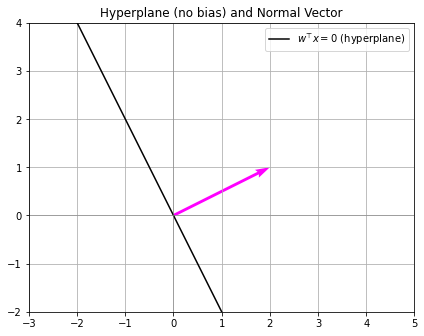

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Define the normal vector w (e.g., 2D)
w = np.array([2, 1])  # change this to try different orientations

# Generate x values
x_vals = np.linspace(-5, 5, 100)

# Hyperplane: w^T x = 0 → w1*x + w2*y = 0 → y = -w1/w2 * x
slope = -w[0] / w[1]
y_vals = slope * x_vals

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x_vals, y_vals, 'k-', label=r'$w^\top x = 0$ (hyperplane)')

# Plot the normal vector from origin
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='magenta')

# Format
ax.set_xlim(-3, 5)
ax.set_ylim(-2, 4)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Hyperplane (no bias) and Normal Vector")
ax.legend()
plt.tight_layout()
plt.show()


Now, we can define all kinds of lengths that the projection onto $\tilde{\vvec{w}}$ shall have. For example, we can define the hyperplane that's orthogonal to the normal vector $\vvec{w}$ from the plot above, and that has distance two to the origin as the hyperplane 
$$\frac{\vvec{w}^\top}{\lVert\vvec{w}\rVert} \vvec{x}=2\Leftrightarrow \tilde{\vvec{w}}^\top\vvec{x}=2.$$
This hyperplane is plotted below.
```{tikz}
\begin{tikzpicture}[scale=1.2, thick, >=Stealth]

  % Axes
  \draw[->,thin] (-1, 0) -- (4, 0) node[anchor=west] {$x_1$};
  \draw[->,thin] (0, -2) -- (0, 4) node[anchor=south] {$x_2$};

  % Normal vector w = (2,1)
  \coordinate (origin) at (0,0);
  \coordinate (w) at (2,1);
  \draw[->, ultra thick, magenta] (origin) -- (3,1.5) node[anchor=south east] {$\mathbf{w}$};

  % Hyperplane: 2x + y - 2 sqrt(5) = 0 → y = -2x + 2 sqrt(5)
  \draw[black, thick, domain=2.8:0.2] plot (\x, {-2*\x + 2*sqrt(5)}) node[anchor=north west, right =4pt] {$\tilde{\mathbf{w}}^\top \mathbf{x} = 2$};

  % Projection of origin onto hyperplane
  % Formula: p = b * w / ||w||^2 → with w = (2,1), b = 2
  \coordinate (proj) at ($(2/2.23*2, 2/2.23*1)$); % = (-0.8, -0.4)

  % Brace-like annotation
  \draw [decorate,decoration={brace,mirror,raise=6pt}, blue, ultra thick] (origin) -- (proj) node[midway, right=13pt, below=12pt, blue] {$\displaystyle \frac{|b|}{\|w\|}=2$};

\end{tikzpicture}
```

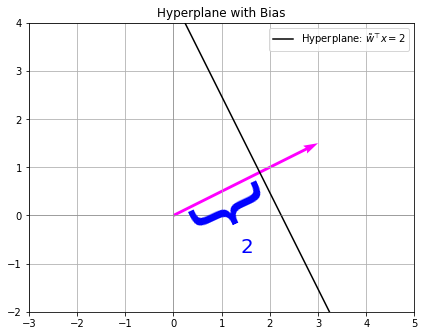

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# Normal vector w and bias b
w = np.array([2, 1])*1.5
b = -2*np.linalg.norm(w)  # nonzero bias


# Hyperplane: w^T x + b = 0 → y = -(w1*x + b)/w2
x_vals = np.linspace(-5, 5, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

# Distance from origin to hyperplane
margin = abs(b) / np.linalg.norm(w)
projection = -b * w / np.dot(w, w)  # projection of origin onto hyperplane

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

# Hyperplane
ax.plot(x_vals, y_vals, 'k-', label=r'Hyperplane: $\tilde{w}^\top x  = 2$')

# Normal vector
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='magenta')

# Simulated brace using a rotated "{" character
brace_x, brace_y = projection / 2
ax.text(brace_x, brace_y-0.1, '{', fontsize=80, ha='center', va='center', rotation=115, color='blue')

# Distance label next to the brace
ax.text(brace_x + 0.5, brace_y-1.1, f"{margin:.0f}", fontsize=20, color='blue', va='center')

# Plot settings
ax.set_xlim(-3, 5)
ax.set_ylim(-2, 4)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Hyperplane with Bias")
ax.legend()
plt.tight_layout()
plt.show()


The hyperplane from the plot above is likewise defined as the points $\vvec{x}$ satisfying
$$\vvec{w}^\top \vvec{x} - 2\lVert\vvec{w}\rVert=0,$$
which adheres to the general definition of a hyperplane with $b=-2\lVert\vvec{w}\rVert$. Keep in mind, that we can interpret this hyperplane equation when dividing by the norm of the vector $\vvec{w}$.
As a result, geometrically we can say that $\vvec{w}$ controls the orientation of the hyperplane, and $b$ controls the offset from the origin.

### Inference of a Linear SVM for Binary Classification
A hyperplane divides a space into two halves. Assuming now that we have only two classes (a binary classification problem). The hyperplane should be positioned such that one class is on one side and the other class is on the other. We can call the sides *positive* and *negative*, the positive side is the one the normal vector points to and the negative is the other side. 

\begin{eqnarray}
{\bf w}^{T} {\bf x} + b &<& 0\,\, \mbox{(negative side)} \nonumber \\
{\bf w}^{T} {\bf x} + b &\geq& 0\,\, \mbox{(positive side)}. \nonumber
\end{eqnarray}

```{tikz}
\begin{tikzpicture}[scale=1.2, thick, every node/.style={font=\large}]
  % Limit the drawing area
  \clip (-5, -4) rectangle (4.5, 3.5);
  % Define the hyperplane: (2x + y)/sqrt(5) = 2 → y = -2x +2/sqrt(5)
  \def\slope{-2}
  \def\intercept{2/2.23}

  % Draw two colored regions
  \fill[blue!10] (-3,{\slope*(-2) + \intercept}) -- (4,{\slope*(-3) + \intercept})-- (4,{\slope*4 + \intercept}) -- cycle;
  \fill[red!10] (-3,{\slope*3 + \intercept}) -- (3,{\slope*3 + \intercept}) -- (-3,{\slope*(-3) + \intercept}) -- cycle;

  % Draw the hyperplane
  \draw[black, thick] (-2, {\slope*(-2) + \intercept}) -- (2, {\slope*2 + \intercept}) node[anchor=north west,below=2pt] {$\mathbf{w}^\top \mathbf{x} + b = 0$};

  % Axes
  \draw[->,thin] (-3, 0) -- (3, 0) node[anchor=west] {$x_1$};
  \draw[->,thin] (0, -3.5) -- (0, 3) node[anchor=south] {$x_2$};

  % Normal vector w = (2,1)
  \draw[->, ultra thick, magenta] (0, 0) -- (1, 0.5) node[anchor=south west] {$\mathbf{w}$};
  \node at (2, 2) {$\mathbf{w}^\top \mathbf{x} + b > 0$};
  \node at (-1.5, -1.5) {$\mathbf{w}^\top \mathbf{x} + b < 0$};
\end{tikzpicture}
```
This way, we can define the inference of the SVM for the binary classification problem
```{prf:definition} SVM for binary Classification
An SVM classifier for a binary classification problem ($y\in\{-1,1\}$) reflects the distance to the decision boundary $\vvec{w}^\top \vvec{x}+b=0$
$$f_{svm}(\vvec{x}) = \vvec{w}^\top \vvec{x}+b.$$
If $f_{svm}(\vvec{x})$ is positive, then we predict class 1, and otherwise class -1. Using the sign function
$$ \sign(a) = \begin{cases} +1 & \text{ if } a \geq 0 \\ -1 & \text{ otherwise}  \end{cases}, $$ 
we define the class prediction as
$$\hat{y} = \sign(\vvec{w}^\top \vvec{x}+b).$$
```
### Training of an SVM when Classes are Separable
We assume for now that the classes are linearly separable, as in our initial example with the two blobs. That means that we can find a hyperplane (defined now as a set)
$\mathcal{H}_{\vvec{w},b}$
such that all training data points of the positive class are on the positive side, and the training data points of the negative class are on the negative side. That is, we can find $\vvec{w}$ and $b$ such that
\begin{align*}
\vvec{w}^\top \vvec{x}_i+b <0 & \text{ for all } i \text{ with }y_i=-1\\
\vvec{w}^\top \vvec{x}_i+b >0 & \text{ for all } i \text{ with }y_i=1.
\end{align*}
The equations above are satisfied if we have for all training data points
$$
(\vvec{w}^\top \vvec{x}_i+b)y_i >0.
$$
The goal of the SVM is to find the hyperplane with maximum margin among all the separable hyperplanes. Hence, the SVM hyperplane maximizes the distance to the closest training data point. This way, we can define our SVM task.
`````{admonition} Task (hard-margin SVM)
:class: tip
**Given** a binary classification training data set $\mathcal{D}=\{(\vvec{x}_i,y_i)\mid 1\leq i\leq n, y_i\in\{-1,1\}\}$.       

**Find** the hyperplane defined as all points in the set $\mathcal{H}_{\vvec{w},b}\{\vvec{x}\mid\vvec{w}^\top\vvec{x}+b=0\}$ separating the classes and having maximum margin (maximizing the distance of the hyperplane to its closest training data point indicated by $dist$).
$$\max_{\vvec{w},b}\min_{1\leq i\leq n}dist(\mathcal{H}_{\vvec{w},b},\vvec{x}_i)\text{ s.t. } y_i(\vvec{w}^\top\vvec{x}_i+b)\geq 0$$
**Return** the hyperplane defining parameters $\vvec{w},b$ 
`````
To formalize the SVM task, we need to know how we compute the distance of a point to a hyperplane. Geometrically, this works by projecting the point on the normal vector $\vvec{w}$, giving the distance from the origin to the projection onto $\vvec{w}$. From this distance, we subtract the offset $b$ and we have the distance to the hyperplane.  
```{tikz}
\begin{tikzpicture}[scale=1.2, thick, >=Stealth]

  % Axes
  \draw[->,thin] (-1, 0) -- (4, 0) node[anchor=west] {$x_1$};
  \draw[->,thin] (0, -2) -- (0, 4) node[anchor=south] {$x_2$};

  % Normal vector w = (2,1)
  \coordinate (origin) at (0,0);
  \coordinate (w) at (2,1);
  \draw[->, ultra thick, magenta] (origin) -- (3,1.5) node[anchor=south east] {$\mathbf{w}$};

  % Hyperplane: 2x + y - 2 sqrt(5) = 0 → y = -2x + 2 sqrt(5)
  \draw[black, thick, domain=2.8:0.2] plot (\x, {-2*\x + 2*sqrt(5)}) node[anchor=north west, right =4pt] {$\tilde{\mathbf{w}}^\top \mathbf{x} = 2$};

  % Projection of origin onto hyperplane
  % Formula: p = b * w / ||w||^2 → with w = (2,1), b = 2
  \coordinate (proj) at ($(2/2.23*2, 2/2.23*1)$); % = (-0.8, -0.4)

  % Brace-like annotation
  \draw [decorate,decoration={brace,mirror,raise=6pt}, blue, ultra thick] (origin) -- (proj) node[midway, right=13pt, below=12pt, blue] {$\displaystyle \frac{|b|}{\|w\|}=2$};
  % Plot point
  \draw (3,3) circle[radius=2pt] node[right=3pt]{$\mathbf{x}$}; 
  \fill (3,3) circle[radius=2pt];
\end{tikzpicture}
```
```{prf:theorem}
The following objective is equivalent to the objective
$$\min_{\vvec{w},b}\lVert \vvec{w}\rVert^2\text{ s.t. } y_i(\vvec{w}^\top\vvec{x}_i+b)\geq 1$$
```

Let us consider first the following two parallel hyperplanes
\begin{eqnarray}
{\bf w}^{T} {\bf x} - b &=& -1\,\, \mbox{(negative boundary)} \nonumber \\
{\bf w}^{T} {\bf x} - b &=& +1\,\, \mbox{(positive boundary)} \nonumber
\end{eqnarray}
defining *negative* and *positive* boundaries such that the maximum-margin hyperplane $ {\bf w}^{T} {\bf x} - b = 0 $ lies halfway between them. We call the region between these *negative* and *positive* boundaries as the *margin*. Lastly, the distance between the *negative* and *positive* boundaries -- or equivalently, the margin thickness -- is given by $ \frac{2}{||{\bf w}||} $.

```{figure} /images/classification/margin_planes_03.png
---
height: 480px
name: margin_planes_03_fig
align: left
---
The *margin* between the *negative* and *positive* boundaries with the decision boundary lies half way between them. The *margin* thickness $ \frac{2}{||{\bf w}||} $ is in turn regulated by the reciprocal of $ || {\bf w} ||$.
```

As the training samples are not allowed to fall in the margin region, we must select $ {\bf w} $ and $ b $ such that 
\begin{eqnarray}
{\bf w}^{T} {\bf x}_{i} - b &\leq& -1\,\, \mbox{if } y_{i} = -1 \nonumber \\
{\bf w}^{T} {\bf x}_{i} - b &\geq& +1\,\, \mbox{if } y_{i} = +1 \nonumber
\end{eqnarray}
for all training samples $ \left( {\bf x}_{i}, y_{i} \right) \in {\cal D} $. Alternatively, we can write
\begin{equation}
y_{i} \left( {\bf w}^{T} {\bf x} - b \right) \geq +1,  \nonumber
\end{equation}
since the class label $ y_{i} $ and the function $ h({\bf x}_{i}; {\bf w}, b) = {\bf w}^{T} {\bf x}_{i} - b $ have always[^footnote2] the same sign $ \forall i \in \lbrace 1, 2, \ldots, N \rbrace $.

[^footnote2]: Assuming that the hyperplane $ {\bf w}^{T} {\bf x} - b = 0$ is a valid decision boundary for the linearly separable training dataset ${\cal D}$.

Thus, we can rewrite the optimization problem in {eq}`svm_form_1` as
```{math}
:label: svm_form_2
\begin{eqnarray}
\left( {\bf w}^{\ast}, b^{\ast} \right) &=& \argmax_{\left( {\bf w}, b \right) \in \mathbb{R}^{D+1}} \frac{2}{||{\bf w}||} \\
&\equiv& \argmax_{\left( {\bf w}, b \right) \in \mathbb{R}^{D+1}} \frac{1}{||{\bf w}||} \\
s.t. &&  y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \geq +1, \,\,\, \forall \left( {\bf x}_{i}, y_{i} \right) \in {\cal D},
\end{eqnarray}
```
i.e. we seek to find the parameters $ {\bf w}^{\ast} $ and $ b^{\ast} $ that maximize the margin thickness $ \frac{2}{||{\bf w}||} $ subjected to the linear constrains $ y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \geq +1 $, $ \forall i \in \lbrace 1, 2, \ldots, N \rbrace $. However, this is a non-convex optimization problem as the denominator $ ||{\bf w}|| $ introduces a singularity in the objective function $ \frac{1}{||{\bf w}||} $ in {eq}`svm_form_2`. Fortunately, we can reformulate the problem of maximizing the reciprocal of the norm $ ||{\bf w}|| $ into the problem o minimizing the norm $ ||{\bf w}|| $ itself
```{math}
:label: svm_form_3
\begin{eqnarray}
\left( {\bf w}^{\ast}, b^{\ast} \right) &=& \argmin_{\left( {\bf w}, b \right) \in \mathbb{R}^{D+1}} ||{\bf w}|| \\
s.t. &&  y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \geq +1, \,\,\, \forall \left( {\bf x}_{i}, y_{i} \right) \in {\cal D},
\end{eqnarray}
```
which is in turn a convex optimization problem. For convenience, we replace the objective function $ ||{\bf w}|| $ in {eq}`svm_form_3` by $ \frac{1}{2}||{\bf w}||^{2} $ -- which is a quadratic function differentiable everywhere -- and write
```{math}
:label: svm_form_4
\begin{eqnarray}
\left( {\bf w}^{\ast}, b^{\ast} \right) &=& \argmin_{\left( {\bf w}, b \right) \in \mathbb{R}^{D+1}} \frac{1}{2}||{\bf w}||^{2} \\
s.t. &&  y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \geq +1, \,\,\, \forall \left( {\bf x}_{i}, y_{i} \right) \in {\cal D},
\end{eqnarray}
```
so that we can use e.g. gradient descent solvers to optimize the parameters $ {\bf w} $ and $ b $.

In summary, we transformed the non-convex optimization problem of maximizing the margin in {eq}`svm_form_1` into a convex optimization problem of minimizing the squared norm $ \frac{1}{2}||{\bf w}||^{2} $ in {eq}`svm_form_4` which is subjected in turn to several margin constraints $$ y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \geq +1, $$ for $ i \in \lbrace 1, 2, \ldots, N \rbrace $.

#### SVM for Two Non-Separable Classes
`````{admonition} Task (soft-margin SVM)
:class: tip
**Given** a binary classification training data set $\mathcal{D}=\{(\vvec{x}_i,y_i)\mid 1\leq i\leq n, y_i\in\{-1,1\}\}$ and parameter $s>0$.       

**Find** the hyperplane defined as all points in the set $\{\vvec{x}\mid\vvec{w}^\top\vvec{x}+b=0\}$ separating the classes and having maximum margin.
$$\min_{\vvec{w},b}\lVert \vvec{w}\rVert^2+s\sum_{i=1}^n\xi_i\text{ s.t. } y_i(\vvec{w}^\top\vvec{x}_i+b)\geq 1 -\xi_i$$
**Return** the hyperplane defining parameters $\vvec{w},b$ 
`````
The parameter $s$ balances margin size vs classification error.
Unfortunately, the hard-margin formulation still requires a linearly separable training dataset $ {\cal D} $ so that the linear constraints $$ y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \geq +1, $$ $ i \in \lbrace 1, 2, \ldots, N \rbrace $, can be satisfied. To overcome this limitation, we can relax the linear constraints by discounting a fixed amount $ \xi_{i} \geq 0 $ from each constraint as $$ y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \geq +1 - \xi_{i} $$ such that the original constraint is fully imposed for $ \xi_{i} = 0 $ and it is incrementally relaxed as $ \xi_{i} $ grows for $ \xi_{i} > 0 $. Let the vector $ \boldsymbol{\xi} = \begin{bmatrix} \xi_{1} & \xi_{2} & \ldots & \xi_{N} \end{bmatrix}^{T} $ collect all $ N $ *slack* variables. Thus, we can rewrite the optimization problem in {eq}`svm_form_4` assuming relaxed linear constraints as
```{math}
:label: svm_form_5
\begin{eqnarray}
\left( {\bf w}^{\ast}, b^{\ast}, \boldsymbol{\xi}^{\ast} \right) &=& \argmin_{\left( {\bf w}, b, \boldsymbol{\xi} \right) \in \mathbb{R}^{D+N+1}} \left\lbrace \frac{1}{2}||{\bf w}||^{2} + C \sum_{i=1}^{N} \xi_{i} \right\rbrace \\
s.t. &&  y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \geq +1 - \xi_{i} \\
&& \xi_{i} \geq 0, \,\, \forall i \in \lbrace 1, 2, \ldots, N \rbrace,
\end{eqnarray}
```
where the hyperparameter $ C > 0 $ regulates the trade off between the original objective function $ \frac{1}{2}||{\bf w}||^{2} $ and the slacks sum $ \sum_{i=1}^{N} \xi_{i} $ such that $ C \rightarrow \infty $ leads to the original optimization problem with hard margin. Conversely, as $ C \rightarrow 0^{+} $, the constraints are increasingly relaxed. Note that this formulation allows the $i$-th training example to violate the original constraint by a fixed amount $ \xi_{i} $ (slack). However, the optimization problem in {eq}`svm_form_5` is set up such that the sum of these violations $ \sum_{i=1}^{N} \xi_{i} $ is also minimized.

````{margin}
```{note}
The slack variables $ \lbrace \xi_{1}, \ldots, \xi_{N} \rbrace $ allow therefore to train a SVM classifier using linearly non-separable datasets. 
```

```{note}
We refer to {eq}`svm_form_5` as the **primal** SVM formulation which allows us to build a SVM classifier using either linearly separable or linearly non-separable training datasets.
```
````

````{prf:remark}
Equivalently, the soft-margin problem in {eq}`svm_form_5` can be reformulated as a convex optimization problem without constraints. In particular, we can write
```{math}
:label: svm_form_6
\begin{equation}
\left( {\bf w}^{\ast}, b^{\ast} \right) = \argmin_{\left( {\bf w}, b, \boldsymbol{\xi} \right) \in \mathbb{R}^{D+1}} \left\lbrace \frac{1}{2}||{\bf w}||^{2} + C \sum_{i=1}^{N} \underbrace{ \max \left( 1 - y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right), 0 \right)}_{\mbox{hinge loss}} \right\rbrace,
\end{equation}
```
in which the hinge loss $$ \epsilon_{i} \triangleq \max \left( 1 - y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right), 0 \right) $$ associated with the $ i $-th training data item is such that
\begin{eqnarray}
y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \geq 1 &\rightarrow& \epsilon_{i} = 0\,\, \mbox{(no penalty)} \nonumber \\
0 \leq y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) < 1 &\rightarrow& 0 < \epsilon_{i} \leq 1\,\, \mbox{(small penalty)} \nonumber \\
y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) < 0 &\rightarrow& \epsilon_{i} > 1\,\, \mbox{(unbounded penalty)}. \nonumber
\end{eqnarray}
Note that there is no penalty in the first case, since the training sample $ \left( {\bf x}_{i}, y_{i} \right) $ is not violating the constraint. On the other hand, there is a small penalty in the second case, as the data item $ {\bf x}_{i} $ falls within the margin, but still in the right side of the hyperplane defined by $ {\bf w} $ and $ b $. The hinge loss grows unbounded in the last case since the data item $ {\bf x}_{i} $ falls on the wrong side of the hyperplane in this case. The objective function in {eq}`svm_form_6` penalizes thus the sum of the hinge losses committed by all data items in $ {\cal D} $. Lastly, as the hinge loss function has a non-linearity around the origin -- it is clamped to zero when the constraint $ y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \geq 1 $ is satisfied --, the objective function is neither differentiable everywhere nor quadratic with respect to the parameters $ {\bf w} $ and $ b $ anymore.
````

````{prf:example}
The effect of the hyperparameter $ C $ on the decision boundary. Note that, as $ C $ grows, the maximum-margin hyperplane becomes more diplomatic in the sense of keeping as much as possible distance to the training examples from different classes. Lastly, note that the final solution becomes influence by more and more data items in $ {\cal D} $ as $ C $ decreases, i.e. more and more support vectors -- corresponding to training samples $ \lbrace \left( {\bf x}', y'\right) \in {\cal D} \mid y' \left( {\bf w}^{T} {\bf x}' - b \right) \leq 1 \rbrace $ -- will contribute to determine the linear decision boundary $ {\bf w}^{T} {\bf x}' - b = 0 $. On the other hand, the training samples $ \lbrace \left( {\bf x}', y'\right) \in {\cal D} \mid y' \left( {\bf w}^{T} {\bf x}' - b \right) > 1 \rbrace $ do not contribute directly to the values of the parameters $ {\bf w} $ and $ b $ in the sense that any changes of their positions in the feature space $ {\cal X} $ without violating the constraints lead to the same solution.

```{figure} /images/classification/effect_softmargin_sep.png
---
height: 200px
name: effect_softmargin_sep_fig
align: left
---
Linearly separable dataset.
```
```{figure} /images/classification/effect_softmargin_nonsep.png
---
height: 200px
name: effect_softmargin_nonsep_fig
align: left
---
Linearly non-separable dataset.
```
````

### Dual SVM formulation

Let us rewrite the hard-margin SVM problem in {eq}`svm_form_4` using the standard format as
```{math}
:label: svm_form_7
\begin{eqnarray}
\minimize_{{\bf w} \in \mathbb{R}^{D}, b \in \mathbb{R}} &&  \frac{1}{2}||{\bf w}||^{2} \\
s.t. \,\,\, &&  1 - y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right) \leq 0, \,\,\, \forall \left( {\bf x}_{i}, y_{i} \right) \in {\cal D}.
\end{eqnarray}
```
We can write the Lagrangian of {eq}`svm_form_7` as
```{math}
:label: lagrandian2
{\cal L}({\bf z}, \boldsymbol{\lambda}) = f({\bf z}) + \sum_{i=1}^{N} \lambda_{i} \left( 1 - y_{i} \left( {\bf w}^{T} {\bf x}_{i} - b \right)  \right),
```
which is convex with respect to the parameters $ {\bf w} $ and $ b $. Thus, we can find the solution to $$ {\cal L}_{dual}(\boldsymbol{\lambda}) = \min_{{\bf z} \in {\cal Z}} {\cal L}({\bf z}, \boldsymbol{\lambda}) $$ by setting both the gradient $$ \nabla_{\bf w} {\cal L}({\bf z}, \boldsymbol{\lambda}) = {\bf w} - \sum_{i=1}^{N} \lambda_{i} y_{i} {\bf x}_{i} $$ and the partial derivative $$ \frac{\partial {\cal L}({\bf z}, \boldsymbol{\lambda})}{\partial b} = \sum_{i=1}^{N} \lambda_{i} y_{i} $$ to zero. Hence, we write
```{math}
:label: w_grad_zero
\nabla_{\bf w} {\cal L}({\bf z}, \boldsymbol{\lambda}) = 0 \Leftrightarrow {\bf w} = \sum_{i=1}^{N} \lambda_{i} y_{i} {\bf x}_{i}
```
```{math}
:label: cond_partial_zero
\frac{\partial {\cal L}({\bf z}, \boldsymbol{\lambda})}{\partial b} = 0 \Leftrightarrow \sum_{i=1}^{N} \lambda_{i} y_{i} = 0.
```
Now, by plugging {eq}`w_grad_zero` and {eq}`cond_partial_zero` back into the Lagrangian definition {eq}`lagrandian2`, we obtain
\begin{eqnarray}
{\cal L}_{dual}(\boldsymbol{\lambda}) &=& \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y_{i} y_{j} {\bf x}_{i}^{T} {\bf x}_{j} + \sum_{i=1}^{N} \lambda_{i} - \underbrace{\sum_{i=1}^{N} \lambda_{i}y_{i} {\bf x}_{i} \sum_{j=1}^{N} \lambda_{j} y_{j} {\bf x}_{j}}_{= \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y_{i} y_{j} {\bf x}_{i}^{T} {\bf x}_{j}} + \underbrace{\sum_{i=1}^{N} \lambda_{i} y_{i}}_{= 0} b \nonumber \\
&=& - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y_{i} y_{j} {\bf x}_{i}^{T} {\bf x}_{j} + \sum_{i=1}^{N} \lambda_{i}.
\end{eqnarray}

Thus, we can write the dual problem in {eq}`dual_prob1` as
```{math}
:label: svm_form8
\begin{eqnarray}
\maximize_{\boldsymbol{\lambda} \geq {\bf 0}} &&  - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y_{i} y_{j} {\bf x}_{i}^{T} {\bf x}_{j} + \sum_{i=1}^{N} \lambda_{i} \\
s.t. \,\,\, &&  \sum_{i=1}^{N} \lambda_{i} y_{i} = 0 \\
&&  0 \leq \lambda_{i}, \,\,\, \forall i \in \lbrace 1, 2, \ldots, N \rbrace,
\end{eqnarray}
```
which is clearly a quadratic program leading therefore to a convex optimization problem. Hence, the optimal $ \boldsymbol{\lambda}^{\ast} $ in {eq}`svm_form8` also delivers the optimal solution for the primal problem in {eq}`svm_form_7`. Specifically,
```{math}
:label: w_optimal
{\bf w}^{\ast} = \sum_{i=1}^{N} \lambda_{i}^{\ast} y_{i} {\bf x}_{i}
```
```{math}
:label: b_optimal
b^{\ast} = ({\bf w}^{\ast})^{T} {\bf x}_{j} - y_{j},
```
in which we plug any training example $ \left( {\bf x}_{j}, y_{j} \right) $ with index $ j \in \lbrace 1, 2, \ldots, N \rbrace $ such that $ \lambda_{j} > 0 $.

Finally, we offer without proof that {eq}`svm_form8` can be rewritten to consider soft-margin constraints simply by plugging in the hyperparameter $ C $ into the linear constraints as follows
```{math}
:label: svm_form9
\begin{eqnarray}
\maximize_{\boldsymbol{\lambda} \geq {\bf 0}}  &&  - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y_{i} y_{j} {\bf x}_{i}^{T} {\bf x}_{j} + \sum_{i=1}^{N} \lambda_{i} \\
s.t. \,\,\, &&  \sum_{i=1}^{N} \lambda_{i} y_{i} = 0 \\
&&  0 \leq \lambda_{i} \leq C, \,\,\, \forall i \in \lbrace 1, 2, \ldots, N \rbrace.
\end{eqnarray}
```

Alternatively, we can rewrite the dual problem in {eq}`svm_form9` more concisely in terms of the so-called Gram matrix, a.k.a. pairwise influence matrix, $ {\bf G} \triangleq \left[ G_{i,j} \right] $ with $ G_{i,j} = y_{i} y_{j} {\bf x}_{i}^{T} {\bf x}_{j} $ for $ i,j \in \lbrace 1, 2, \ldots N \rbrace $ as
```{math}
:label: svm_form10
\begin{eqnarray}
\maximize_{\boldsymbol{\lambda} \geq {\bf 0}}  &&  - \frac{1}{2} \boldsymbol{\lambda}^{T} {\bf G} \boldsymbol{\lambda} + {\bf 1}^{T} \boldsymbol{\lambda} \\
s.t. \,\,\, &&   {\bf y}^{T} \boldsymbol{\lambda} = 0 \\
&&  0 \leq \lambda_{i} \leq C, \,\,\, \forall i \in \lbrace 1, 2, \ldots, N \rbrace,
\end{eqnarray}
```
with $ {\bf y} \triangleq \begin{bmatrix} y_{1} & y_{2} & \ldots & y_{N} \end{bmatrix}^{T} $ and $ \boldsymbol{\lambda} = \begin{bmatrix} \lambda_{1} & \lambda_{2} & \ldots & \lambda_{N} \end{bmatrix}^{T} $ collecting the labels and the slack variables associated with each training example, respectively, and $ {\bf 1} \triangleq \begin{bmatrix} 1 & 1 & \ldots & 1 \end{bmatrix}^{T} $ representing a vector of $1$'s with appropriate number of dimensions -- in this case $ N $. Note also that {eq}`svm_form10` is equivalent to writing
```{math}
:label: svm_form11
\begin{eqnarray}
\minimize_{\boldsymbol{\lambda} \geq {\bf 0}}  &&  \frac{1}{2} \boldsymbol{\lambda}^{T} {\bf G} \boldsymbol{\lambda} - {\bf 1}^{T} \boldsymbol{\lambda} \\
s.t. \,\,\, &&   {\bf y}^{T} \boldsymbol{\lambda} = 0 \\
&&  0 \leq \lambda_{i} \leq C, \,\,\, \forall i \in \lbrace 1, 2, \ldots, N \rbrace.
\end{eqnarray}
```

```{prf:remark}
As the objective function $ \frac{1}{2} || {\bf w} ||^{2} $ in {eq}`svm_form9` depends on the coefficient vector $$ {\bf w} = \begin{bmatrix} w_{1} & w_{2} & \ldots & w_{D} \end{bmatrix}^{T}, $$ the primal SVM problem has computational complexity $ {\cal O}(D) $ with $ D $ denoting the number of features in the feature space $ {\cal X} $. On the other hand, the dual SVM problem in {eq}`svm_form9` is clearly quadratic on the number of samples $ N $, i.e it has computational complexity $ {\cal O} (N^{2}) $. Thus, for a large number of features $ D \gg N $, the dual SVM problem can be cheaper, while the solution to the primal SVM problem has a smaller computational burden for large datasets with $ N \gg D $.
```

````{margin}
```{note}
The objective function of the dual SVM problem formulations in {eq}`svm_form8`--{eq}`svm_form11` depends only on the inner products $ \lbrace {\bf x}_{i}^{T} {\bf x}_{j} \rbrace $ with $ i,j \in \lbrace 1, 2, \ldots, N \rbrace $. This dependence unlocks the kernel trick that will be discussed in the sequel.
```
````

### A word on kernels

A kernel function $ k({\bf x}_{i}, {\bf x}_{j}) $ maps pairs of vectors $ {\bf x}_{i}, {\bf x}_{j} $ residing in a $D$-dimensional Euclidean space $ \mathbb{R}^{D} $ into real numbers in $ \mathbb{R} $, i.e. $$ k: \mathbb{R}^{D} \times \mathbb{R}^{D} \rightarrow \mathbb{R}. $$ Furthermore, a kernel is positive definite if for any *finite* collection of vectors $ {\bf x}_{1}, \ldots, {\bf x}_{N} $ and any collection of real numbers $ a_{1}, \ldots, a_{N} $, the following holds $$ \sum_{i=1}^{N} \sum_{j=1}^{N} a_{i} a_{j} {\bf x}_{i}^{T} {\bf x}_{j} \geq 0. $$ Alternatively, we can write in vector notation as
```{math}
:label: positive_definite
{\bf a}^{T} {\bf K} {\bf a} \geq 0,
```
where $ {\bf K} = \left[ K_{i,j} \right] $ is a $ N \times N $ matrix with $ K_{i,j} = k({\bf x}_{i}, {\bf x}_{j}) $ for all $ i,j \in \lbrace 1, 2, \ldots, N \rbrace $ and $ {\bf a} = \begin{bmatrix} a_{1} & a_{2} & \ldots & a_{N} \end{bmatrix}^{T} $ is an arbitrary vector in $ \mathbb{R}^{N} $.

### Kernel trick

Applying non-linear transformations of the type $$ \phi : {\cal X} \rightarrow {\cal Z} $$ mapping feature vectors $ {\bf x} \in {\cal X} $ into a higher-dimensional space $ {\cal Z} $ can significantly boost several Machine Learning (ML) algorithms, for instance SVMs, Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA).

Mapping feature vectors into such high-dimensional space $ {\cal Z} $ can be effective but it is often expensive and selecting the proper non-linear transformation $ \phi(\cdot) $ is also a hard task. Fortunately, provided that the ML algorithm works with inner products of feature vectors as in {eq}`svm_form8`--{eq}`svm_form11`, the kernel trick allows one to work with high-dimensional spaces efficiently since it avoids computing $ \phi(\cdot) $ explicitly.

In most classification problems, decision boundaries are far from linear. In particular, for real-world binary classification problems, chances are that no hyperplane can separate training examples from both classes. On the other hand, high-dimensional data tends to be linearly separable. Intuitively, as the number of features increases, chances are that the data become linearly separable with respect of some of these features.

One approach to increase the number of dimensions is to apply **non-linear feature transforms** to the original features in $ {\cal X} $ transforming thus the learning problem into a higher dimensional feature space $ {\cal Z} $. Note though that the feature transformations must be non-linear, for instance polynomials, exponential (e.g. $\exp$), logarithm (e.g. $\log$) and trigonometric functions (e.g. $\cos$, $\sin$, $\tanh$). This is a necessary (non-sufficient) condition. Note though that if we apply linear (affine) transformations, the data in ${\cal Z} $ will still linearly non-separable as in the original feature space $ {\cal X} $.

{numref}`non_linear_transformation_fig` illustrates a particular non-linear transformations of features. Note that, despite being linearly non-separable in the original space $ {\cal X} $, the non-linear features in $ {\cal Z} $ become linearly separable, i.e. one can design a linear classifier of the type 
$$
h({\bf z}; {\bf w}, b) = \sgn({\bf w}^{T} {\bf z} - b)
$$
residing in the non-linear feature space $ {\cal Z} $ that is able to separate the data from both classes. Equivalently, we can also write
$$
h({\bf x}; {\bf w}, b) = \sgn({\bf w}^{T} \phi({\bf x}) - b).
$$

```{figure} /images/classification/degree2_monomials.png
---
height: 320px
name: non_linear_transformation_fig
align: left
---
Non-linear transformation $\phi: \mathbb{R}^2 \rightarrow \mathbb{R}^3 $ mapping feature vectors $ {\bf x} = \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{T} $ into non-linear feature vectors $ {\bf z} = \begin{bmatrix} z_1 & z_2 & z_3 \end{bmatrix}^{T} $ such that $ {\bf z} = \phi({\bf x}) := \begin{bmatrix} x_1^2 & \sqrt{2} x_1 x_2 & x_2^2 \end{bmatrix}^{T} $. The original bi-dimensional feature space in the left is unsuitable for a linear classifier. However, the non-linear transformation of features yields to a three-dimensional feature space in the right in which the data is linearly separable for some classifier of the type $ h({\bf z}; {\bf w}, b) = \sgn({\bf w}^{T} {\bf z} - b) $ (borrowed from {cite}`scholkopfmax2013max`).
```

````{margin}
```{note}
Therefore, a linear classifier operating on a non-linear feature space leads to a non-linear classifier. Schematically, $$ \mbox{non-linear features} + \mbox{linear classifier} = \mbox{non-linear classifier}. $$ 
```
````

Unfortunately, there are too many non-linear transforms to the features. In addition to this, selecting a non-linear transform $\phi: {\cal X} \rightarrow {\cal Z} $ that leads to a non-linear feature space $ {\cal Z} $ in which the transformed data from $ {\cal X} $ is linearly separable is not a straightforward task. Furthermore, for a given class of non-linear transformations, the number of possible features might quickly explode. For example, let us consider all polynomials of degree $K$. Thus, there are ${D + K - 1}\choose {K}$ possible features to select -- with $D$ denoting the number of features in the original feature space $ {\cal X}$ -- when designing the non-linear feature space ${\cal Z}$. In particular, $D=100$ and $K=5$ yields $75 \times 10^6$ possible features. Therefore, checking all possible combinations of non-linear features to select a suitable non-linear transform $\phi$ is prohibitive.

Fortunately, many learning algorithms can be re-formulated such that they work only with labels $ y_{1}, y_{2}, \ldots, y_{N} $ and **inner products** $ {\bf x}_{i}^{T} {\bf x}_{j} $. For those algorithms, we can employ the **Kernel Trick** to efficiently work with high-dimensional features spaces without explicitly transforming the original features.

More precisely, let us define a $ N \times N $ pairwise similarity matrix $ {\bf K} \triangleq \left[ K_{i,j} \right] $ -- a.k.a. Gram matrix -- such that
```{math}
:label: pairwise_similarity1
\begin{eqnarray}
K_{i,j} &=& k({\bf x}_{i}, {\bf x}_{j}) \\
&=& \phi({\bf x}_{i})^{T} \phi({\bf x}_{j})
\end{eqnarray}
```
$ \forall i,j \lbrace 1, 2, \ldots, N \rbrace $. As $$ \phi({\bf x}_{i})^{T} \phi({\bf x}_{j}) = 0 \Leftrightarrow \phi({\bf x}_{i}) \perp \phi({\bf x}_{j}), $$ the function $ k({\bf x}_{i}, {\bf x}_{j}) $ is a similarity measure -- a scalar -- of the transformed, non-linear feature vectors $ \phi({\bf x}_{i}) $ and $ \phi({\bf x}_{j}) $. We can also define the similarity measure between the training samples $ {\cal D}_{i} = \left( {\bf x}_{i}, y_{i} \right) $ and $ {\cal D}_{j} = \left( {\bf x}_{j}, y_{j} \right) $ as
```{math}
:label: pairwise_similarity2
\begin{eqnarray}
g({\cal D}_{i}, {\cal D}_{j}) &=& y_{i} y_{j} \phi({\bf x}_{i})^{T} \phi({\bf x}_{j}) \\
&=&  y_{i} y_{j} k({\bf x}_{i}, {\bf x}_{j}).
\end{eqnarray}
```
Note that for normalized feature vectors $ \phi({\bf x}_{i}) $ and $ \phi({\bf x}_{j}) $, $ k({\bf x}_{i}, {\bf x}_{j}) \geq 0 $. Thus, the sign of the product $ y_{i} y_{j} $ indicates either a label matching ($ +1 $) or mismatching ($ -1 $) in binary classification problems with labels in $ {\cal Y} = \lbrace -1, +1 \rbrace $. In this case, we can redefine the Gram matrix as a $ N \times N $ influence matrix $ {\bf G} = \left[ G_{i,j} \right] $ such that $$ G_{i,j} = g({\cal D}_{i}, {\cal D}_{j}) $$ for all $ i,j \in \lbrace 1, 2, \ldots, N \rbrace $.

Now, let us rewrite the dual SVM problem in the non-linear feature space $ {\cal Z} $ as
```{math}
:label: svm_form12
\begin{eqnarray}
\maximize_{\boldsymbol{\lambda} \geq {\bf 0}}  &&  - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y_{i} y_{j} \phi({\bf x}_{i})^{T} \phi({\bf x}_{j}) + \sum_{i=1}^{N} \lambda_{i} \\
s.t. \,\,\, &&  \sum_{i=1}^{N} \lambda_{i} y_{i} = 0 \\
&&  0 \leq \lambda_{i} \leq C, \,\,\, \forall i \in \lbrace 1, 2, \ldots, N \rbrace.
\end{eqnarray}
```
Thus, as far as we are able to compute the similarity metric $ k({\bf x}_{i}, {\bf x}_{j}) $ implicitly, we can efficiently solve the optimization problem in {eq}`svm_form12` without computing the non-linear features $ \lbrace \phi({\bf x}_{i}) \rbrace $, $ i \in \lbrace 1, 2, \ldots, N \rbrace $. Fortunately, this possible as far as the the kernel $ k({\bf x}_{i}, {\bf x}_{j}) $ satisfies some mild conditions.

Now, we offer without proof a key theorem for the Kernel Trick.
```{prf:theorem} Representer theorem
A kernel function $ k: {\cal X} \times {\cal X} \rightarrow \mathbb{R} $ is positive definite i.f.f. it corresponds to the inner product in some feature space $ {\cal Z} $ defined by the transformation $ \phi: {\cal X} \rightarrow {\cal Z} $, i.e. $$ \exists \phi({\bf x}) \mid k({\bf x}_{i}, {\bf x}_{j}) = \phi({\bf x}_{i})^{T} \phi({\bf x}_{j}) \Leftrightarrow \forall {\bf a} \in \mathbb{R}^{N}  \mid {\bf a}^{T} {\bf K} {\bf a} \geq 0 $$ with $ {\bf K} = \left[ K_{i,j} \right] $ denoting a $ N \times N $ matrix such that $ K_{i,j} = k({\bf x}_{i}, {\bf x}_{j}) $, $ \forall i,j \in \lbrace 1, 2, \ldots, N \rbrace $.
```
As a corollary, if we choose a particular function $ k({\bf x}_{i}, {\bf x}_{j}) $ such that $ \sum_{i=1}^{N} \sum_{j=1}^{N} a_{i} a_{j} {\bf x}_{i}^{T} {\bf x}_{j} \geq 0 $ for all data items $ i,j \in \lbrace 1, 2, \ldots, N \rbrace $ in your training dataset $ {\cal D} $, we can compute the inner product $ \phi({\bf x}_{i})^{T} \phi({\bf x}_{j}) $ implicitly without even knowing the non-linear transformation $ \phi({\bf x}) $. Putting in other words, if the matrix $ {\bf K} $ is positive definite such that {eq}`positive_definite` holds, we can replace the the product $ \phi({\bf x}_{i})^{T} \phi({\bf x}_{j}) $ in {eq}`svm_form12` by the kernel $ k({\bf x}_{i}, {\bf x}_{j}) $ to obtain the kernelized SVM formulation
```{math}
:label: svm_form13
\begin{eqnarray}
\maximize_{\boldsymbol{\lambda} \geq {\bf 0}}  &&  - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y_{i} y_{j} k({\bf x}_{i}, {\bf x}_{j}) + \sum_{i=1}^{N} \lambda_{i} \\
s.t. \,\,\, &&  \sum_{i=1}^{N} \lambda_{i} y_{i} = 0 \\
&&  0 \leq \lambda_{i} \leq C, \,\,\, \forall i \in \lbrace 1, 2, \ldots, N \rbrace
\end{eqnarray}
```
which is still a quadratic program (convex) and therefore the global optimal solution $ \boldsymbol{\lambda}^{\ast} $ to this dual problem also leads to an optimal solution to the primal problem in {eq}`svm_form_7`. Note that the Kernel Trick allows one to generalize several learning algorithms which rely on inner products (e.g. SVMs, PCAs and LDAs). Moreover, it also allows one to work with *non-vector* data (e.g. strings and graphs) by means of the selection of a proper kernel / similarity measure $ k({\bf x}_{i}, {\bf x}_{j}) $ between the data items / objects within the original object space $ {\cal X} $.

Typical kernel functions employed
* **Linear** $ k({\bf x}_{i}, {\bf x}_{j}) = {\bf x}_{i}^{T} {\bf x}_{j} $, which corresponds to working in the original feature space, i.e. $ \phi({\bf x}) = {\bf x} $;
* **Polynomial** $ k({\bf x}_{i}, {\bf x}_{j}) = (1 + {\bf x}_{i}^{T} {\bf x}_{j})^{p}$, which corresponds to $\phi$ mapping to all polynomials -- non-linear features -- up to degree $p$;
* **Gaussian** $ k({\bf x}_{i}, {\bf x}_{j}) = \exp(-\gamma || {\bf x}_{i} - {\bf x}_{j} ||^{2}) $, which corresponds in turn to an infinite feature space or functional space with infinite number of dimensions.

Recall from {eq}`w_optimal` and {eq}`b_optimal` that
```{math}
:label: w_optimal2
{\bf w}^{\ast} = \sum_{i=1}^{N} \lambda^{\ast}_{i} y_{i} {\bf x}_{i}
```
```{math}
:label: b_optimal2
b^{\ast} = {{\bf w}^{\ast}}^{T} {\bf x}_{i} - y_{i}.
```
Now, by substituting $ {\bf x}_{i} $ by $ \phi({\bf x}_{i} ) $ in {eq}`w_optimal2` and in {eq}`b_optimal2`, we have
```{math}
:label: w_optimal3
{\bf w}^{\ast} = \sum_{i=1}^{N} \lambda^{\ast}_{i} y_{i} \phi({\bf x}_{i})
```
```{math}
:label: b_optimal3
b^{\ast} = {{\bf w}^{\ast}}^{T} \phi({\bf x}_{i}) - y_{i}.
```
Lastly, by plugging {eq}`w_optimal3` into {eq}`b_optimal3`, we can compute the optimal offset term
\begin{eqnarray}
b^{\ast} &=& \left( \sum_{j=1}^{N} \lambda^{\ast}_{j} y_{j} \phi({\bf x}_{j}) \right)^{T} \phi({\bf x}_{i}) - y_{i} \nonumber \\
&=& \sum_{j=1}^{N} \lambda^{\ast}_{j} y_{j} \underbrace{\phi({\bf x}_{j})^{T} \phi({\bf x}_{i})}_{k({\bf x}_{j}, {\bf x}_{i})} - y_{i} \nonumber \\
&=& \sum_{j=1}^{N} \lambda^{\ast}_{j} y_{j} k({\bf x}_{j}, {\bf x}_{i}) - y_{i}
\end{eqnarray}
using any training example $ {\cal D}_{i} = \left( {\bf x}_{i}, y_{i} \right) $, $ i \in \lbrace 1, 2, \ldots, N \rbrace $, whose corresponding Lagrange multiplier $ \lambda^{\ast}_{i} > 0 $.

Note however that there is no need to compute the optimal coefficient vector $ {\bf w}^{\ast} $ explicitly. Specifically, for an arbitrary feature vector $ {\bf x} $ in the original feature space $ {\cal X} $, the Kernelized SVM classifier in the non-linear feature space $ {\cal Z} $ -- determined by some mapping function $ \phi:{\cal X} \rightarrow {\cal Z} $ -- can be written as
\begin{eqnarray}
h_{kSVM}({\bf x}) &=& \sgn \left( {{\bf w}^{\ast}}^{T} \phi({\bf x}) - b^{\ast} \right) \nonumber \\
&=& \sgn \left( \left( \sum_{i=1}^{N} \lambda^{\ast}_{i} y_{i} \phi({\bf x}_{i}) \right)^{T} \phi({\bf x}) - b^{\ast} \right) \nonumber \\
&=& \sgn \left( \sum_{i=1}^{N} \lambda^{\ast}_{i} y_{i} \underbrace{\phi({\bf x}_{i})^{T} \phi({\bf x})}_{k({\bf x}_{i}, {\bf x})} - b^{\ast} \right). \nonumber
\end{eqnarray}
Finally leading to
```{math}
:label: kerneliezed_svm
h_{kSVM}({\bf x}) = \sgn \left( \sum_{i=1}^{N} \lambda^{\ast}_{i} y_{i} k({\bf x}_{i}, {\bf x}) - b^{\ast} \right).
```

````{prf:example} Kernelized SVM classifier in action using a toy example with *sklearn*
Figures below illustrate the effect of different Kernels with *sklearn* using a toy binary classification example. {numref}`toyexp_kernel_svm_01_fig` shows a linear kernel failing miserably to separate training data items assigned to <span style="color: blue;">blue</span> and <span style="color: red;">red</span> class labels; {numref}`toyexp_kernel_svm_02_fig` a polynomial kernel with degree $p=4$ is able to circumscribe the data items assigned to the <span style="color: blue;">blue</span> labels; and {numref}`toyexp_kernel_svm_03_fig` a Gaussian kernel -- a.k.a. radial basis function -- is also able to separate both classes, but using kind of more rounded decision boundary between classes.

```{figure} /images/classification/toyexp_kernel_svm_01.png
---
height: 200px
name: toyexp_kernel_svm_01_fig
align: left
---
classifier = svm.SVC(kernel='linear', C=C)
```

```{figure} /images/classification/toyexp_kernel_svm_02.png
---
height: 200px
name: toyexp_kernel_svm_02_fig
align: left
---
classifier = svm.SVC(kernel='poly', degree=4, C=C)
```

```{figure} /images/classification/toyexp_kernel_svm_03.png
---
height: 200px
name: toyexp_kernel_svm_03_fig
align: left
---
classifier = svm.SVC(kernel='rbf', C=C)
```
````

````{margin}
```{note}
SVMs and Kernels were hot research topics in the 90's and early 2000's. Nevertheless, Kernelized SVMs still one of the strongest classifiers today.
```
````